In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [3]:
data = pd.read_csv('Income_prediction.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
for col in data[['workclass','occupation','native.country']]:
    data[col] = data[col].replace('?',np.nan)

In [9]:
data.dropna(how = 'any', inplace = True)

In [10]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [11]:
import warnings; warnings.simplefilter('ignore')

In [12]:
data['occupation'].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [13]:
data['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [14]:
data['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [15]:
data['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [16]:
data['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

# Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
X1 = data[['occupation']]
lm = LabelEncoder()
a = ['occupation']
for i in np.arange(len(a)):
    X1[a[i]] = lm.fit_transform(X1[a[i]])
data['occupation'] = X1   

In [19]:
X2 = data[['education']]
lm = LabelEncoder()
b = ['education']
for i in np.arange(len(b)):
    X2[b[i]] = lm.fit_transform(X2[b[i]])
data['education'] = X2 

In [20]:
X3 = data[['workclass']]
lm = LabelEncoder()
a = ['workclass']
for i in np.arange(len(a)):
    X3[a[i]] = lm.fit_transform(X3[a[i]])

data['workclass'] = X3

In [21]:
X4 = data[['native.country']]
lm = LabelEncoder()
a = ['native.country']
for i in np.arange(len(a)):
    X4[a[i]] = lm.fit_transform(X4[a[i]])
data['native.country'] = X4


In [22]:
X5 = data[['marital.status']]
lm = LabelEncoder()
a = ['marital.status']
for i in np.arange(len(a)):
    X5[a[i]] = lm.fit_transform(X5[a[i]])
data['marital.status'] = X5

In [23]:
X6 = data[['relationship']]
lm = LabelEncoder()
a = ['relationship']
for i in np.arange(len(a)):
    X6[a[i]] = lm.fit_transform(X6[a[i]])
data['relationship'] = X6

In [24]:
inc = data[['income']]
lm = LabelEncoder()
a = ['income']
for i in np.arange(len(a)):
    inc[a[i]] = lm.fit_transform(inc[a[i]])
data['income'] = inc
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,White,Female,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,White,Female,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,White,Female,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,White,Female,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,White,Male,0,3770,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,4,10,1,White,Male,0,0,40,38,0
32557,27,2,257302,7,12,2,12,5,White,Female,0,0,38,38,0
32558,40,2,154374,11,9,2,6,0,White,Male,0,0,40,38,1
32559,58,2,151910,11,9,6,0,4,White,Female,0,0,40,38,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  int64 
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  int64 
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  int64 
 6   occupation      30162 non-null  int64 
 7   relationship    30162 non-null  int64 
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  int64 
 14  income          30162 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 3.7+ MB


In [26]:
y = pd.DataFrame(data['income'])
data.income.value_counts(normalize = True)

0    0.751078
1    0.248922
Name: income, dtype: float64

In [27]:
data1 = data.drop('income',axis = 1)
data1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,2,132870,11,9,6,3,1,White,Female,0,4356,18,38
3,54,2,140359,5,4,0,6,4,White,Female,0,3900,40,38
4,41,2,264663,15,10,5,9,3,White,Female,0,3900,40,38
5,34,2,216864,11,9,0,7,4,White,Female,0,3770,45,38
6,38,2,150601,0,6,5,0,4,White,Male,0,3770,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,4,10,1,White,Male,0,0,40,38
32557,27,2,257302,7,12,2,12,5,White,Female,0,0,38,38
32558,40,2,154374,11,9,2,6,0,White,Male,0,0,40,38
32559,58,2,151910,11,9,6,0,4,White,Female,0,0,40,38


Applying dummy values

In [28]:
sx = pd.get_dummies(data1['sex'])
rc = pd.get_dummies(data1['race'])

In [29]:
sx

,Female,Male
1,1,0
3,1,0
4,1,0
5,1,0
6,0,1
...,...,...
32556,0,1
32557,1,0
32558,0,1
32559,1,0


In [30]:
rc

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
1,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1
6,0,0,0,0,1
...,...,...,...,...,...
32556,0,0,0,0,1
32557,0,0,0,0,1
32558,0,0,0,0,1
32559,0,0,0,0,1


In [31]:
data1 = pd.concat([data1,sx,rc],axis=1)
data1 = data1.drop(['sex','race'],axis = 1)

In [32]:
x = data1
x

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
1,82,2,132870,11,9,6,3,1,0,4356,18,38,1,0,0,0,0,0,1
3,54,2,140359,5,4,0,6,4,0,3900,40,38,1,0,0,0,0,0,1
4,41,2,264663,15,10,5,9,3,0,3900,40,38,1,0,0,0,0,0,1
5,34,2,216864,11,9,0,7,4,0,3770,45,38,1,0,0,0,0,0,1
6,38,2,150601,0,6,5,0,4,0,3770,40,38,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,4,10,1,0,0,40,38,0,1,0,0,0,0,1
32557,27,2,257302,7,12,2,12,5,0,0,38,38,1,0,0,0,0,0,1
32558,40,2,154374,11,9,2,6,0,0,0,40,38,0,1,0,0,0,0,1
32559,58,2,151910,11,9,6,0,4,0,0,40,38,1,0,0,0,0,0,1


# Training the Model

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.2,random_state = 2)

In [35]:
print(x_test.shape)
print(y_test.shape)

(6033, 19)
(6033, 1)


# 1)Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier(n_estimators = 120,
                             criterion = 'entropy',
                             max_depth = 24,
                             max_features = 'auto',
                             bootstrap = False,
                             verbose = 2,
                             warm_start = True,
                             random_state = 2,
                             n_jobs = -1
                            )
rft.fit(x_train,y_train)
y_pred = rft.predict(x_test)



In [38]:
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print('Precision score =', precision_score(y_test,y_pred, average = 'binary'))
print('Recall score =',recall_score(y_test,y_pred, average = 'binary'))
print('f1 score = ',f1_score(y_test,y_pred,average = 'binary'))
confusion_matrix(y_test,y_pred)


Accuracy score =  0.8604342781369136
Precision score = 0.7582329317269076
Recall score = 0.6356902356902356
f1 score =  0.6915750915750916


array([[4247,  301],
       [ 541,  944]])

# 2) Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logit = LogisticRegression(class_weight = {0:0.39, 1:1})
logit.fit(x_train,y_train)
y_pred = logit.predict(x_test)

In [41]:
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print('Precision score =', precision_score(y_test,y_pred))
print('Recall score =',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy score =  0.7825294215150008
Precision score = 0.6130718954248366
Recall score = 0.31582491582491584
f1 score =  0.4168888888888889


array([[4252,  296],
       [1016,  469]])

# 3) Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
dt_model = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(dt_model, param_dist, cv = 5) 
tree_cv.fit(x_train,y_train)
y_pred = tree_cv.predict(x_test)
   

  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 


  

  
# Print the tuned parameters and score 
#print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
#print("Best score is {}".format(tree_cv.best_score_)) 


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 8}
Best score is 0.8396120581736664


In [43]:
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print('Precision score =', precision_score(y_test,y_pred))
print('Recall score =',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy score =  0.8491629371788496
Precision score = 0.7305533279871692
Recall score = 0.6134680134680135
f1 score =  0.6669106881405564


array([[4212,  336],
       [ 574,  911]])

# 4) KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,25)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

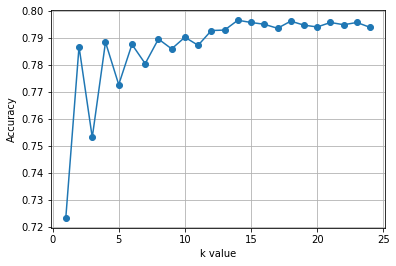

In [45]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [46]:
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [47]:
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print('Precision score =', precision_score(y_test,y_pred, average = 'binary'))
print('Recall score =',recall_score(y_test,y_pred, average = 'binary'))
print('f1 score = ',f1_score(y_test,y_pred,average = 'binary'))
confusion_matrix(y_test,y_pred)

Accuracy score =  0.7961213326703133
Precision score = 0.8294573643410853
Recall score = 0.21616161616161617
f1 score =  0.34294871794871795


array([[4482,   66],
       [1164,  321]])

# Best Deployed Model - Random Forest Classifier

Accuracy score =  0.8604342781369136 | 
Precision score = 0.7582329317269076 |
Recall score = 0.6356902356902356    |
f1 score =  0.6915750915750916